Scrapping Data From a Real Website + pandas

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html')

In [5]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

In [8]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [11]:
 table = soup.find('table', class_ = 'wikitable sortable')

In [12]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [18]:
 world_titles = table.find_all('th')

In [19]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [20]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [21]:
import pandas as pd

In [22]:
 df = pd.DataFrame(columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [23]:
column_data =  table.find_all('tr')

In [26]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

['1', 'Walmart', 'Retail', '648,125', '6.0%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '574,785', '11.9%', '1,525,000', 'Seattle, Washington']
['3', 'Apple', 'Electronics industry', '383,482', '-2.8%', '161,000', 'Cupertino, California']
['4', 'UnitedHealth Group', 'Healthcare', '371,622', '14.6%', '440,000', 'Minnetonka, Minnesota']
['5', 'Berkshire Hathaway', 'Conglomerate', '364,482', '20.7%', '396,500', 'Omaha, Nebraska']
['6', 'CVS Health', 'Healthcare', '357,776', '10.9%', '259,500', 'Woonsocket, Rhode Island']
['7', 'ExxonMobil', 'Petroleum industry', '344,582', '-16.7%', '61,500', 'Spring, Texas']
['8', 'Alphabet', 'Technology and cloud computing', '307,394', '8.7%', '182,502', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,000', 'Irving, Texas']
['10', 'Cencora', 'Pharmacy wholesale', '262,173', '9.9%', '44,000', 'Conshohocken, Pennsylvania']
['11', 'Costco', 'Retail', '242,290', '6.8%', '3

In [29]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

In [30]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,100,Best Buy,Retail,"43,452",-6.1%,"85,000","Richfield, Minnesota"
1,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
2,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
3,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
4,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
96,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
97,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
98,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
99,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [37]:
df.to_csv(r"C:\Users\a\OneDrive\Desktop\comapnies.csv",index = False)

In [ ]:
# Exploratory Data Analysis

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [27]:
# Load dataset
df = pd.read_csv(r"C:\Users\a\Downloads\web scrapping\india_forbes_2000_companies.csv")


In [34]:
df

,Rank,Forbes2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,49,Reliance Industries Limited,Mumbai,108.8,8.4,210.5,233.1,Conglomerate
1,2,55,State Bank of India,Mumbai,71.8,8.1,807.4,87.6,Banking
2,3,65,HDFC Bank,Mumbai,49.3,7.7,483.2,133.6,Banking
3,4,70,Life Insurance Corporation,New Delhi,98.0,4.9,561.4,73.6,Insurance
4,5,142,ICICI Bank,Mumbai,28.5,5.3,283.5,95.3,Banking
...,...,...,...,...,...,...,...,...,...
66,65,1895,Dr. Reddy's Laboratories,Hyderabad,3.4,0.7,4.6,11.6,Pharmaceuticals
67,66,1908,Varun Beverages,Gurgaon,2.0,0.3,1.8,23.6,Beverages
68,67,1949,CIFCL,Chennai,2.3,0.4,18.8,13.0,Financials
69,68,1957,NMDC,Hyderabad,2.5,0.8,3.9,9.7,Mining


In [40]:
# Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (71, 9)

Data Types:
 Rank                       int64
Forbes2000 rank            int64
Name                      object
Headquarters              object
Revenue(billions US$)    float64
Profit(billions US$)     float64
Assets(billions US$)     float64
Value(billions US$)      float64
Industry                  object
dtype: object

Missing Values:
 Rank                     0
Forbes2000 rank          0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     1
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64


In [45]:
# Remove duplicate rows ( duplicate Ranks,Name)

df = df.drop_duplicates(subset=["Rank", "Name"])


In [46]:
# Convert numeric columns

numeric_cols = ["Revenue(billions US$)", "Profit(billions US$)", "Assets(billions US$)", "Value(billions US$)"]


df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [49]:
# Summary statistics

print("\nSummary Statistics:\n", df[numeric_cols].describe())




Summary Statistics:
        Revenue(billions US$)  Profit(billions US$)  Assets(billions US$)  \
count              71.000000             70.000000             71.000000   
mean               17.812676              1.727143             71.621127   
std                23.347499              1.927522            132.730041   
min                 0.200000              0.000000              1.300000   
25%                 4.150000              0.500000             10.550000   
50%                10.800000              0.950000             27.400000   
75%                17.750000              2.275000             58.200000   
max               108.800000              8.400000            807.400000   

       Value(billions US$)  
count            71.000000  
mean             33.588732  
std              37.901853  
min               1.100000  
25%              12.000000  
50%              23.600000  
75%              39.000000  
max             233.100000  


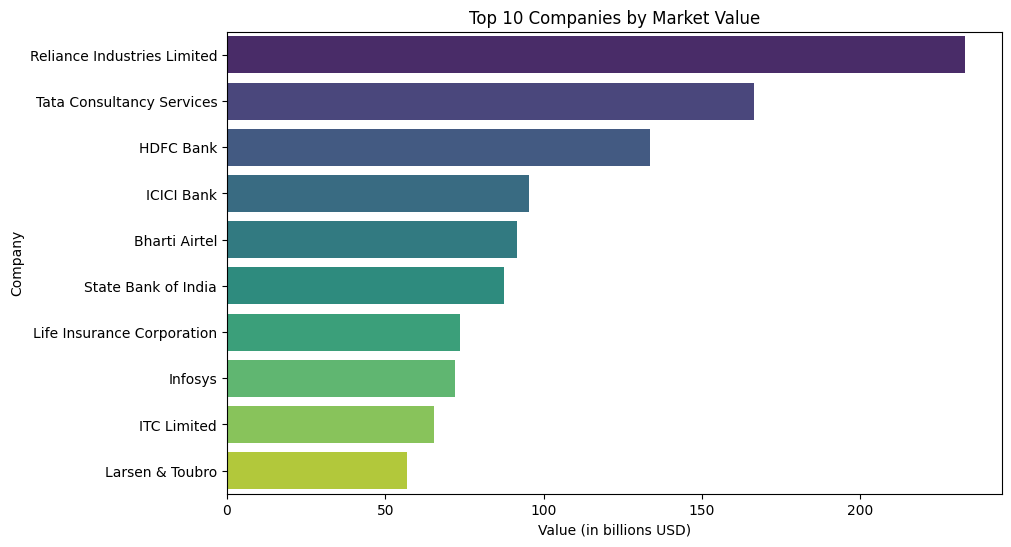

In [50]:
# Top 10 companies by Value
top_value = df.sort_values(by="Value(billions US$)", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Value(billions US$)", y="Name", data=top_value, palette="viridis")
plt.title("Top 10 Companies by Market Value")
plt.xlabel("Value (in billions USD)")
plt.ylabel("Company")
plt.show()




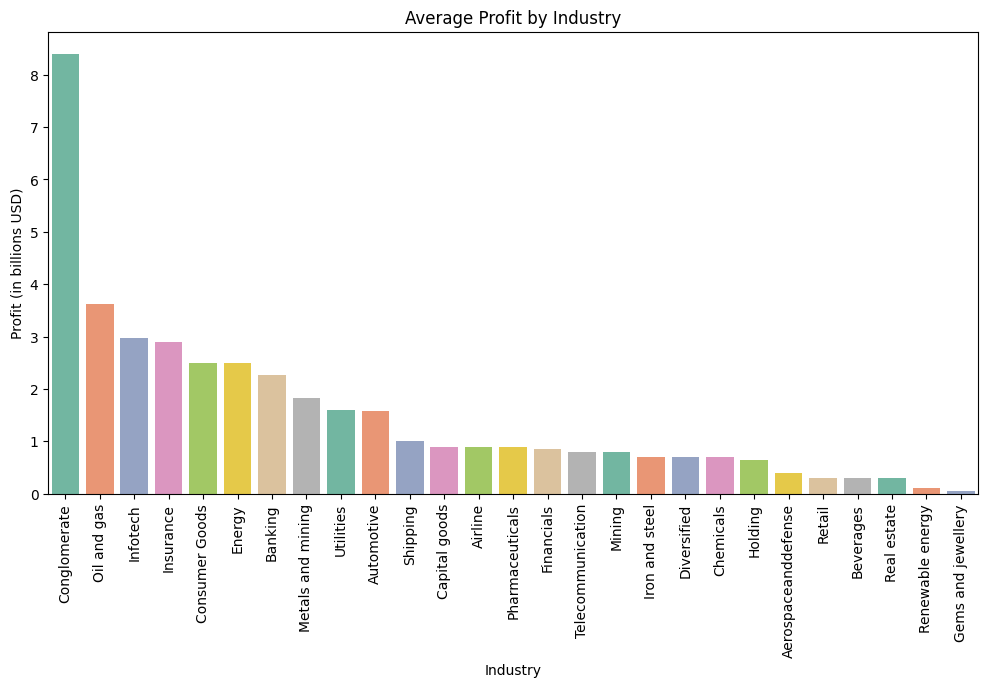

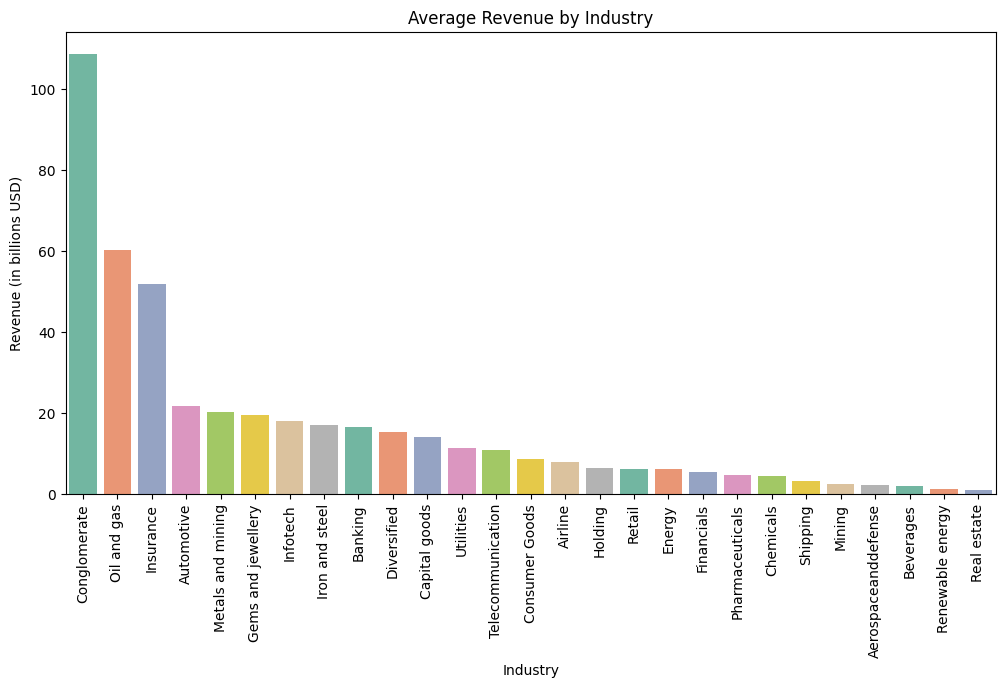

In [65]:
# Industry-wise average Profit and Revenue

industry_group = df.groupby("Industry")[["Profit(billions US$)", "Revenue(billions US$)"]].mean()\
    .sort_values(by=["Profit(billions US$)", "Revenue(billions US$)"], ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_group.index, y=industry_group["Profit(billions US$)"],palette='Set2')
plt.xticks(rotation=90)
plt.title("Average Profit by Industry")
plt.ylabel("Profit (in billions USD)")
plt.show()

industry_group_revenue_sorted = industry_group.sort_values(by="Revenue(billions US$)", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_group_revenue_sorted.index, y=industry_group_revenue_sorted["Revenue(billions US$)"], palette='Set2')
plt.xticks(rotation=90)
plt.title("Average Revenue by Industry")
plt.ylabel("Revenue (in billions USD)")
plt.show()



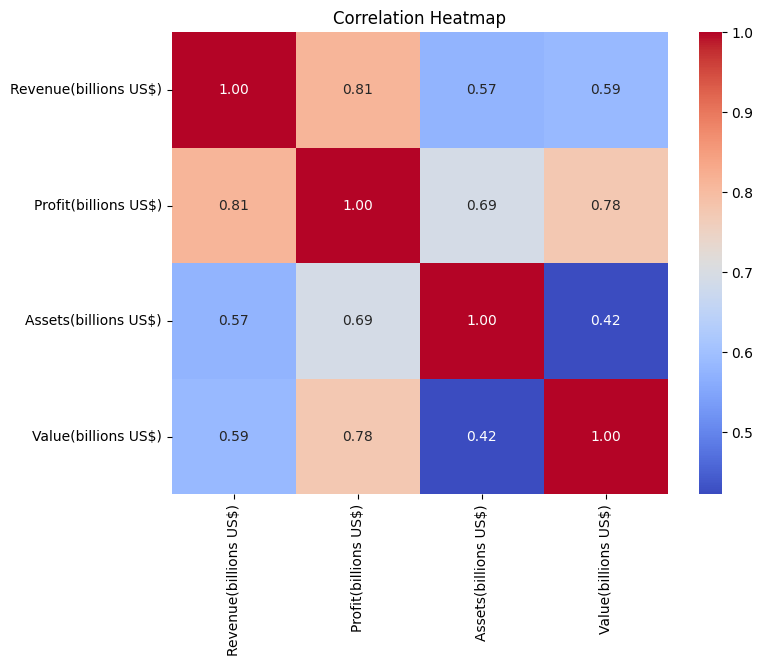

In [68]:
# Correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

